**Predicting housing prices using Linear Regression, Multilinear Regression, and Polynomial Regression involves building a model that can predict the price of a house based on various features like size, number of rooms, etc. Below is a step-by-step explanation of how to do this, including code for each method.**

# Linear Regression
   

Step 1: Import Libraries First, we need to import the necessary libraries like pandas for data handling, matplotlib for plotting, and sklearn for modeling.

Step 2: Load and Explore the Data We will load the dataset (e.g., housing prices) and explore its structure.

Step 3: Define Features and Target Variable Identify which column(s) will be used as features (like house size) and which will be the target (house price).

Step 4: Split the Data Split the data into training and testing sets using train_test_split.

Step 5: Train the Model Fit the linear regression model on the training data.

Step 6: Make Predictions Predict house prices using the test set.

Step 7: Evaluate the Model Use metrics like Mean Absolute Error (MAE) or Mean Squared Error (MSE) to evaluate the performance of the model.


   Rooms  Floors  Size      Price
0      1       1  3997  479175.50
1      2       2   753   70674.84
2      2       1  2311  264903.14
3      1       2  3971  263219.99
4      1       2  3590  283168.34
Mean Squared Error: 13914342952.921772
R-squared: 0.5209691509511558


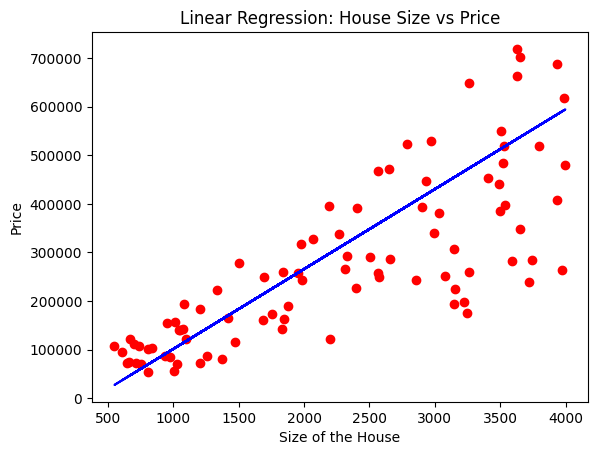

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset (you can replace this with any dataset)
data = pd.read_csv('housing_prices.csv')

# Step 2: Explore the dataset
print(data.head())

# Step 3: Define features and target
X = data[['Size']]  # Features (independent variables)
y = data['Price']   # Target (dependent variable)

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.9, random_state=42)

# Step 5: Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = lin_reg.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualizing the results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.xlabel('Size of the House')
plt.ylabel('Price')
plt.title('Linear Regression: House Size vs Price')
plt.show()


Final slope (m): 124.14354874107897, Intercept (c): 0.08485754383728342


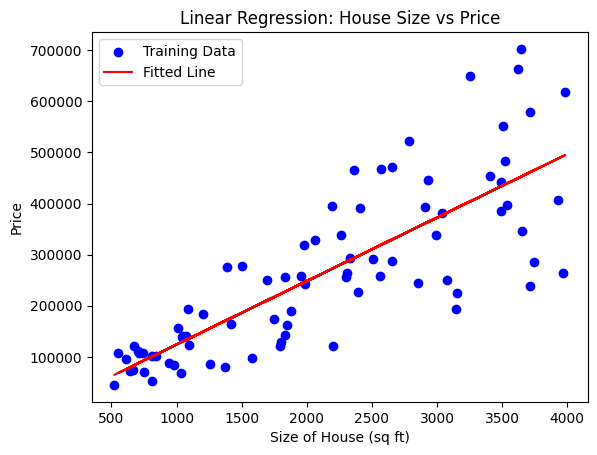

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('housing_prices.csv')

# Features and target
X = data[['Size']]  # Size of houses (independent variable)
y = data['Price']   # Prices of houses (dependent variable)

# Split the data (use 90% for testing as per your test_size parameter)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters for the regression line
m = 0  # slope
c = 0  # intercept
learning_rate = 0.0000001  # learning rate
epochs = 1000  # Number of iterations

# Define the function to make predictions
def predict(X, m, c):
    return m * X + c

# Gradient descent training
for epoch in range(epochs):
    y_pred = predict(X_train, m, c).values.flatten()  # Predictions on the training set
    
    # Calculate Mean Squared Error
    error = (1 / len(X_train)) * np.sum((y_pred - y_train) ** 2)
    
    # Calculate gradients
    dm = -(2 / len(X_train)) * np.sum(X_train.values.flatten() * (y_train - y_pred))
    dc = -(2 / len(X_train)) * np.sum(y_train - y_pred)
    
    # Update the parameters
    m -= learning_rate * dm
    c -= learning_rate * dc

# Final values of slope and intercept
print(f"Final slope (m): {m}, Intercept (c): {c}")

# Plotting the results
plt.scatter(X_train, y_train, color='blue', label="Training Data")  # Actual data points
plt.plot(X_train, predict(X_train, m, c), color='red', label="Fitted Line")  # Regression line
plt.xlabel('Size of House (sq ft)')
plt.ylabel('Price')
plt.title('Linear Regression: House Size vs Price')
plt.legend()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('housing_prices.csv')

In [18]:
# Step 1: Define multiple features
X = data[['Size', 'Rooms', 'Floors']]  # Multiple independent variables
y = data['Price'] 
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_multi = multi_reg.predict(X_test)

# Step 5: Evaluate the model
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print("Multilinear Regression Mean Squared Error:", mse_multi)
print("Multilinear Regression R-squared:", r2_multi)



Multilinear Regression Mean Squared Error: 16650119113.528086
Multilinear Regression R-squared: 0.5748913847606849


Polynomial Regression Mean Squared Error: 16469725253.064367
Polynomial Regression R-squared: 0.57949717668905


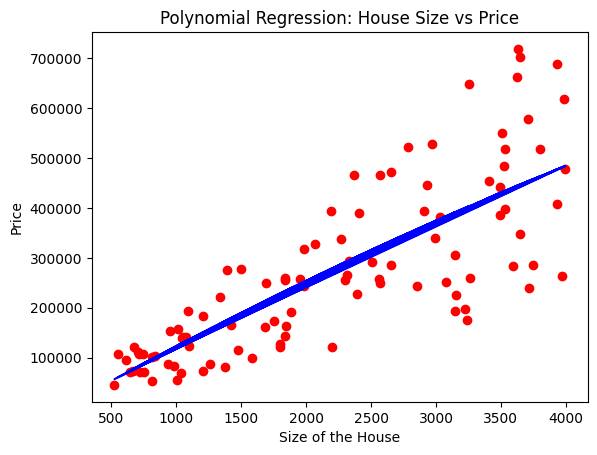

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Generate Polynomial Features (degree 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X[['Size']])

# Step 2: Split the data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Step 3: Train the model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)

# Step 4: Make predictions
y_pred_poly = poly_reg.predict(X_test_poly)

# Step 5: Evaluate the model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print("Polynomial Regression Mean Squared Error:", mse_poly)
print("Polynomial Regression R-squared:", r2_poly)

# Visualizing the results
plt.scatter(X[['Size']], y, color='red')
plt.plot(X[['Size']], poly_reg.predict(poly_features.fit_transform(X[['Size']])), color='blue')
plt.xlabel('Size of the House')
plt.ylabel('Price')
plt.title('Polynomial Regression: House Size vs Price')
plt.show()
